In [1]:
#Install the autocorrect library
!pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 622 kB 5.0 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622382 sha256=beb6467aa33fe6f1c84b0451076ab91d0a3077da5d64795e3ea34ce86d3ffa9f
  Stored in directory: /root/.cache/pip/wheels/54/d4/37/8244101ad50b0f7d9bffd93ce58ed7991ee1753b290923934b
Successfully built autocorrect


In [2]:
# Importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()

import re
from bs4 import BeautifulSoup
import unicodedata

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from scipy import interp
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

from autocorrect import Speller


import nltk
nltk.download('all', halt_on_error=False)
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import gensim

from collections import Counter

np.set_printoptions(precision=2, linewidth=80)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

**Initial Analysis & EDA**

In [7]:
import nltk
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import gensim
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import cosine_similarity
#from rake_nltk import Rake
from sklearn.metrics import confusion_matrix, accuracy_score
import re
from textblob import TextBlob
from sklearn.model_selection import KFold

In [4]:
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
from autocorrect import Speller
spell = Speller()

In [12]:
Review_df = pd.read_csv('reviews_train.csv')

In [13]:
Review_df.sentiment.value_counts()

1    956
0    955
Name: sentiment, dtype: int64

In [14]:
Review_df.shape

(1911, 2)

In [15]:
Review_Combined = " ".join(Review_df.review.values)
Review_combined_correct = spell(Review_Combined)

In [16]:
len(Review_combined_correct)

178658

In [17]:
def remove_special_characters(text):
    text = re.sub(r'[^a-zA-z0-9\s]', '', text)
    return text

In [18]:
Review_No_Char = remove_special_characters(Review_combined_correct)
len(Review_No_Char)

174300

In [19]:

from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
Review_all = word_tokenize(Review_No_Char.lower())
len(set(Review_all))

3215

In [21]:
len(Review_all)

29272

In [22]:
from string import punctuation
from nltk.corpus import stopwords

In [23]:
stop_words=stopwords.words("english")
stop_words.remove('not')
stop_words.remove('no')
stop_words_all = stop_words + list(punctuation) + ["XYZ", "xyz", "company","Company"] +["...", ".............................", "/", "\r\r\n"]

In [24]:
Review_updated = [word for word in Review_all if word not in stop_words_all and len(word) >= 2]

In [25]:
Review_updated1 = " ".join(Review_updated)

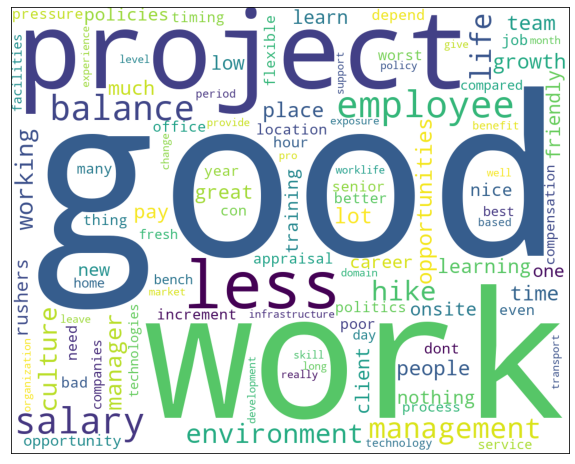

In [26]:
word_cloud = WordCloud().generate_from_text(Review_updated1)
word_cloud = WordCloud(width=1000,height=800,background_color='white',collocations= False,max_words = 100,random_state = 166).\
generate_from_text(Review_updated1)
plt.figure(figsize=[10,10])
plt.imshow(word_cloud)
plt.xticks([])
plt.yticks([])
plt.show()

In [27]:
#from nltk.stem import SnowballStemmer
#stemmer_s = SnowballStemmer("english")
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
Review_lemm = [ lemm.lemmatize(word) for word in Review_updated]

In [29]:
print ("Actual Data Length", len(set(Review_updated)))
#print("Length after Stemming",len(set(Data_stem)))
print("Length after Lemmatization",len(set(Review_lemm)))

Actual Data Length 3076
Length after Lemmatization 2821


In [30]:
# Define function that takes in a raw string, returns a clean string
# - Tokenize, lower case, remove stop words, stitch back to string
def clean_lemm (sent):
    tokens = word_tokenize(sent.lower())
    lemmatized = [lemm.lemmatize (term, pos = 'v') for term in  tokens if term not in stop_words_all and len(term)>=2]
    review = " ".join(lemmatized)
    return review

In [31]:
Review_df['clean_reviewlemm'] = Review_df.review.apply(clean_lemm)
Review_df.head(10)

,review,sentiment,clean_reviewlemm
0,Increment is not good you have to switch in or...,0,increment not good switch order get good hike ...
1,It depends on the team you are working with. I...,1,depend team work work good team
2,"Might not be good at hike system, compare to o...",0,might not good hike system compare world leade...
3,Less Hike and Les salary,0,less hike les salary
4,Onsite opportunity will be minimal,0,onsite opportunity minimal
5,Very less or none onsite opportunity,0,less none onsite opportunity
6,"no increments , Variable pay out",0,no increments variable pay
7,Depends on Project.\r\r\nno learning.,0,depend project no learn
8,Great company to learn and grow,1,great learn grow
9,Very political company .. and depressing envir...,0,political .. depress environment


In [32]:
Review_combinedlemm = " ".join(Review_df.clean_reviewlemm.values)

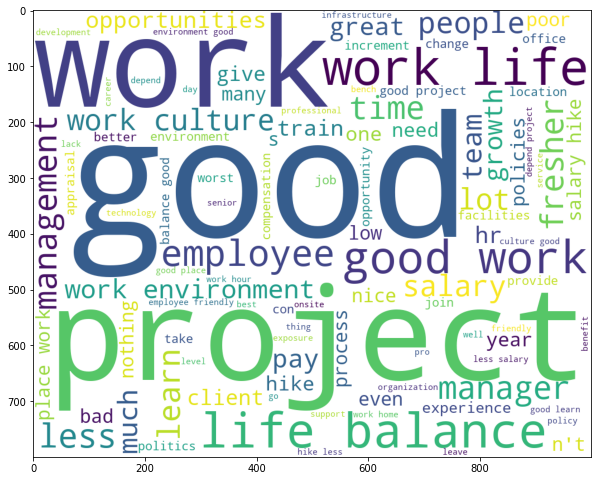

In [33]:
word_cloud = WordCloud().generate_from_text(Review_combinedlemm)
word_cloud = WordCloud(width=1000,height=800,background_color='white',max_words = 100,random_state = 166, mode = 'RGBA').\
generate_from_text(Review_combinedlemm)
plt.figure(figsize=[10,10])
plt.imshow(word_cloud)
plt.show()

In [34]:
all_terms = []
fdist = {}
all_terms = Review_combinedlemm.split(" ")
for word in all_terms:
    fdist[word] = fdist.get(word,0) + 1

In [35]:
print(fdist)

{'increment': 32, 'not': 348, 'good': 915, 'switch': 14, 'order': 3, 'get': 184, 'hike': 193, 'salary': 221, 'depend': 62, 'team': 107, 'work': 946, 'might': 11, 'system': 24, 'compare': 52, 'world': 9, 'leaders': 2, 'technology': 37, 'though': 9, 'one': 67, 'try': 7, 'part': 13, 'facility': 25, 'less': 242, 'les': 4, 'onsite': 71, 'opportunity': 59, 'minimal': 6, 'none': 11, 'no': 316, 'increments': 16, 'variable': 24, 'pay': 109, 'project': 335, 'learn': 189, 'great': 93, 'grow': 22, 'political': 3, '..': 52, 'depress': 1, 'environment': 177, 'culture': 159, 'support': 34, 'colleague': 3, 'corn': 1, 'pure': 4, 'development': 30, 'opertunity': 1, 'food': 18, 'nightmare': 1, 'much': 92, 'right': 15, 'candidates': 4, 'new': 69, 'competition': 3, 'among': 6, 'service': 39, 'providers': 1, 'better': 48, 'life': 197, 'balance': 207, 'compensation/benefits/increments': 1, 'satisfactory': 3, 'negative': 5, 'point': 11, 'low': 87, 'go': 32, 'give': 67, 'job': 56, 'location': 47, 'hometown': 1

In [36]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq) 
df_dist.head()

,words,freq
0,increment,32
1,not,348
2,good,915
3,switch,14
4,order,3


In [37]:
df_sort=df_dist.sort_values(ascending=False, by="freq").head(20)
df_sort.head()

,words,freq
10,work,946
2,good,915
1,not,348
32,project,335
28,no,316


<BarContainer object of 20 artists>

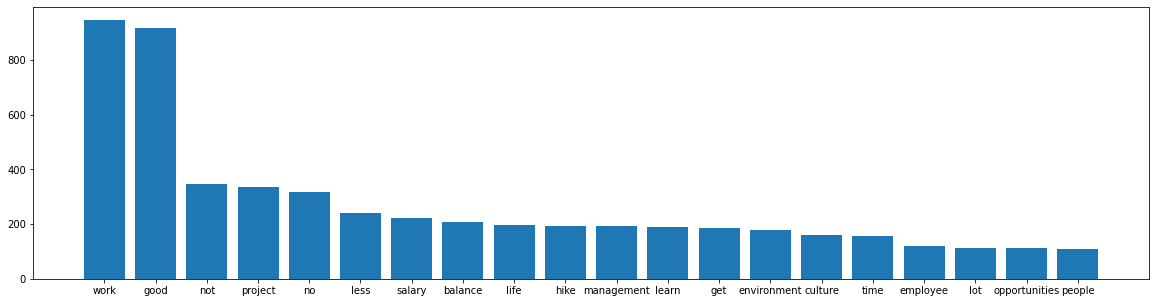

In [38]:
fig = plt.figure(figsize =(20,5))
plt.bar(df_sort["words"], df_sort["freq"])

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
bigram_count_vectorizer = CountVectorizer(ngram_range=(2,2),max_features = 1660)
bigram_tfidf_vectorizer = TfidfVectorizer(ngram_range=(2,2),max_features = 1660)

In [43]:
Data_bigram = bigram_count_vectorizer.fit_transform(Review_df['clean_reviewlemm'])
Data_tfidfgram = bigram_tfidf_vectorizer.fit_transform(Review_df['clean_reviewlemm'])
# Creating a DTM

DTM_bigram = pd.DataFrame(Data_bigram.toarray(), columns=bigram_count_vectorizer.get_feature_names())
TFidfunigram = pd.DataFrame(Data_tfidfgram.todense(), columns=bigram_tfidf_vectorizer.get_feature_names())
Data_bigram

<1911x1660 sparse matrix of type '<class 'numpy.int64'>'
	with 6652 stored elements in Compressed Sparse Row format>

In [44]:
DTM_bigram.head()

,10 no,12 days,12 months,15 days,30 hours,90 days,accord market,acquire company,acquire igate,activities carry,...,worst salary,worst work,would say,would suggest,yearly hike,years experience,years get,years not,years provide,years salary
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


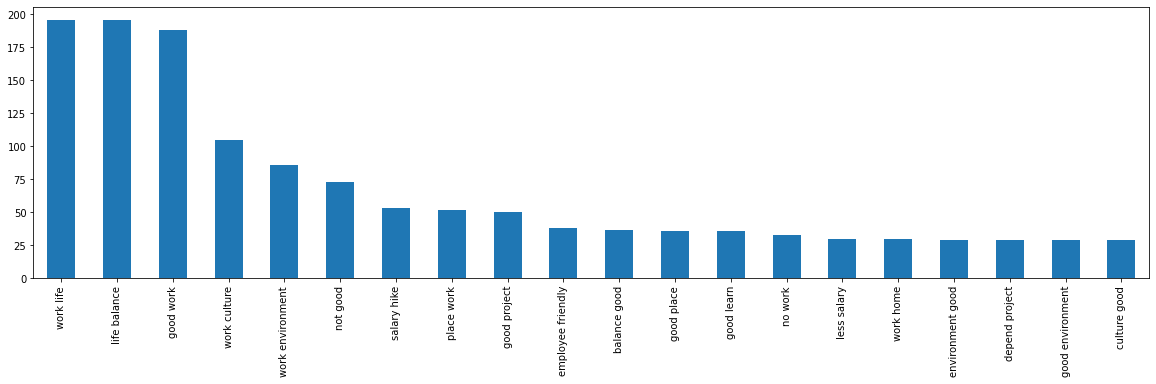

In [45]:
DTM_bigram.sum().sort_values(ascending=False).head(20).plot.bar(figsize=(20,5)) 

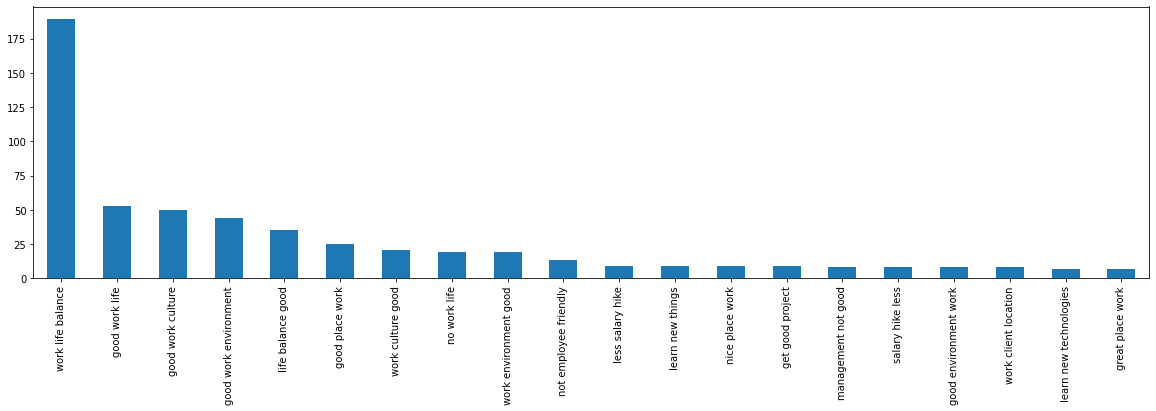

In [46]:
tigram_count_vectorizer = CountVectorizer(ngram_range=(3,3),max_features = 100)
Data_tigram = tigram_count_vectorizer.fit_transform(Review_df['clean_reviewlemm'])

# Creating a DTM

DTM_tigram = pd.DataFrame(Data_tigram.toarray(), columns=tigram_count_vectorizer.get_feature_names())
DTM_tigram.sum().sort_values(ascending=False).head(20).plot.bar(figsize=(20,5)) 

In [47]:
### Sentiment analysis and sentiment classification - use Vader to tag the sentiment scores as positive/negative
Analyzer = SentimentIntensityAnalyzer()

In [48]:
def get_vader_sentiment(sent):
    return Analyzer.polarity_scores(sent)['compound']

In [49]:
Review_df['score_vader'] = Review_df.review.apply(get_vader_sentiment)

In [50]:
Review_df['Sent_prediction_vader'] = Review_df.score_vader.\
apply(lambda x:1 if x>0.206 else 0)

In [51]:
accuracy_score(Review_df.sentiment,Review_df.Sent_prediction_vader)

0.8205128205128205

In [52]:
confusion_matrix(Review_df.sentiment,Review_df.Sent_prediction_vader)

array([[772, 183],
       [160, 796]])

In [53]:
Review_df['Sent_classification_vader'] = Review_df.score_vader.\
apply(lambda x:"Positive" if x>0.206 else "Negative")

In [54]:
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

In [55]:
# Creates a new column containing the subjectivity of every review
Review_df['Subjectivity'] = Review_df['review'].apply(getSubjectivity)
Review_df.head()

,review,sentiment,clean_reviewlemm,score_vader,Sent_prediction_vader,Sent_classification_vader,Subjectivity
0,Increment is not good you have to switch in or...,0,increment not good switch order get good hike ...,-0.5875,0,Negative,0.600000
1,It depends on the team you are working with. I...,1,depend team work work good team,0.4404,1,Positive,0.600000
2,"Might not be good at hike system, compare to o...",0,might not good hike system compare world leade...,-0.3412,0,Negative,0.366667
3,Less Hike and Les salary,0,less hike les salary,0.0000,0,Negative,0.066667
4,Onsite opportunity will be minimal,0,onsite opportunity minimal,0.4215,1,Positive,0.600000


In [56]:
positive_review = Review_df.loc[Review_df["Sent_classification_vader"] == "Positive"]
negative_review = Review_df.loc[Review_df["Sent_classification_vader"] == "Negative"]

In [57]:
positive_review.reset_index(drop=True, inplace=True)
negative_review.reset_index(drop=True, inplace=True)

In [58]:
#Top 5 Potive & Negative Review

In [59]:
positive_review.sort_values(by = ['score_vader'], ascending = False).head()

,review,sentiment,clean_reviewlemm,score_vader,Sent_prediction_vader,Sent_classification_vader,Subjectivity
435,1. Great company for learning & global exposur...,1,1. great learn global exposure invest lot lear...,0.9761,1,Positive,0.236039
501,1.One of the best reason to work at XYZ is tha...,1,1.one best reason work get monthly salary last...,0.9754,1,Positive,0.362500
709,I have worked for XYZ for 3.8 years. XYZ provi...,1,work 3.8 years provide opportunities explore e...,0.9716,1,Positive,0.413068
430,Allows freedom. Awesome culture. Great opportu...,1,allow freedom awesome culture great opportunit...,0.9702,1,Positive,0.710000
516,1. Great atmosphere to work if you land in a g...,1,1. great atmosphere work land good project goo...,0.9657,1,Positive,0.673333


In [60]:
negative_review.sort_values(by = ['score_vader'], ascending = True).head()

,review,sentiment,clean_reviewlemm,score_vader,Sent_prediction_vader,Sent_classification_vader,Subjectivity
817,I want to share my experience with XYZ with yo...,0,want share experience reason long n't happen o...,-0.9590,0,Negative,0.504803
165,1. No work life balance \r\r\n2. 9 .5 hr worki...,0,1. no work life balance .5 hr work hr 3. trave...,-0.9589,0,Negative,0.580643
377,bro i had worked in chennai XYZ karapakkam(sta...,1,bro work chennai karapakkam standard charter b...,-0.9538,0,Negative,0.397917
677,No pros only cons. Never join this company eve...,1,no pros con never join ever even offer double ...,-0.9512,0,Negative,0.470000
43,One of my experience was very bad due to below...,0,one experience bad due reason 1. require work ...,-0.9469,0,Negative,0.415398


In [62]:
pd.set_option('display.max_colwidth',None)

In [63]:
Negative = pd.DataFrame(negative_review.sort_values(by = 'score_vader', ascending = True).head())
Negative['clean_reviewlemm'].head(1)

817    want share experience reason long n't happen one else con review might lengthy .but 's true core personally go start one one meet appraiser cycle did't happen remember exactly team members close manager rat disclose get double promotion like many employee ask till last day rat cycle shut say `` tomorrow take '' rat come tell senior manager hr no response.hr tell ask regularly regard ca n't anything later lot request meet take place meet manager aggressive rude talk like criminal even deliver project time get appreciation client one sentence still remember `` n't want grand father story '' shout loudly rude manner.who talk employee like ever since target try everything could make quite want share incidents take day apply leave earlier get approve come back saw many mail state take leave without permission project bad shape totally fault mail cc higher managers show mail proof leave approve supervisor bt shut rude manner.againg go hr ask help nothing later sick manager fill timesh

In [64]:
Positive = pd.DataFrame(positive_review.sort_values(by = 'score_vader', ascending = False).head())
Positive['clean_reviewlemm'].head(1)

435    1. great learn global exposure invest lot learn development talents learn platform offer variety self learn digital course topics like ai automation cloud devops big data etc helpful non-technical person like build knowledge new age technologies 2. offer opportunities collaborate global team 3. good people look transformation change management program experience 4. invest heavily train employee engagement brand 5. offer good work life balance 6. offer employee stock program across grade months maternity leave
Name: clean_reviewlemm, dtype: object

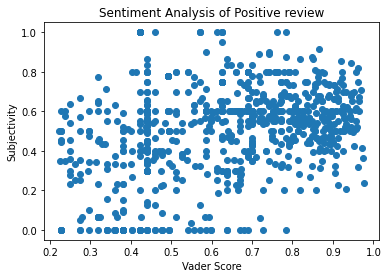

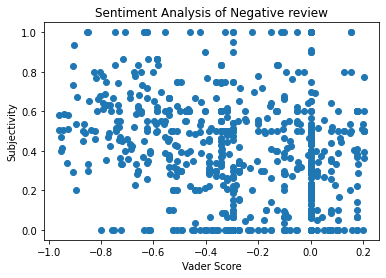

In [65]:
plt.scatter(positive_review["score_vader"], positive_review["Subjectivity"])

plt.title('Sentiment Analysis of Positive review') 
plt.xlabel('Vader Score') 
plt.ylabel('Subjectivity') 
plt.show()


plt.scatter(negative_review["score_vader"], negative_review["Subjectivity"])

plt.title('Sentiment Analysis of Negative review') 
plt.xlabel('Vader Score') 
plt.ylabel('Subjectivity') 
plt.show()

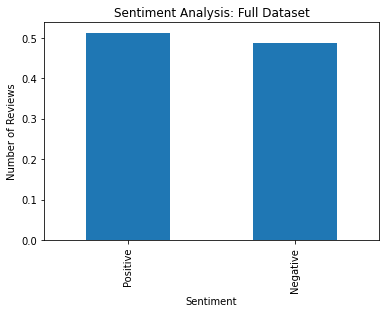

In [66]:
plt.title("Sentiment Analysis: Full Dataset")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
((Review_df["Sent_classification_vader"].value_counts())/Review_df.shape[0]).plot(kind = "bar")
plt.show()

In [67]:
Positive_Review = " ".join(positive_review.clean_reviewlemm.values)

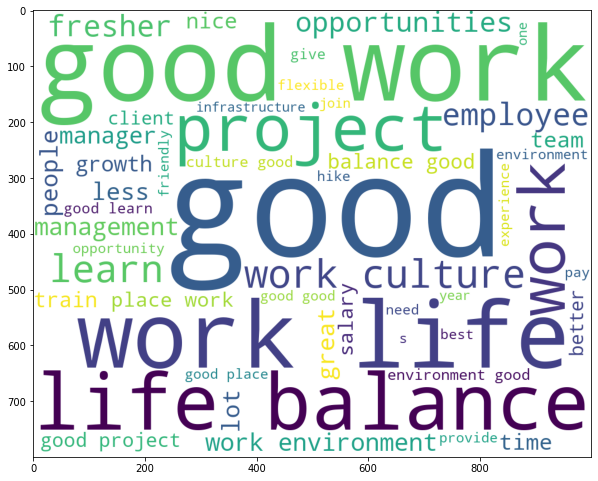

In [68]:
word_cloud = WordCloud().generate_from_text(Positive_Review)
word_cloud = WordCloud(width=1000,height=800,background_color='white',max_words = 50,random_state = 166, mode = 'RGBA').\
generate_from_text(Positive_Review)
plt.figure(figsize=[10,10])
plt.imshow(word_cloud)
plt.show()

In [69]:
Negative_Review = " ".join(negative_review.clean_reviewlemm.values)

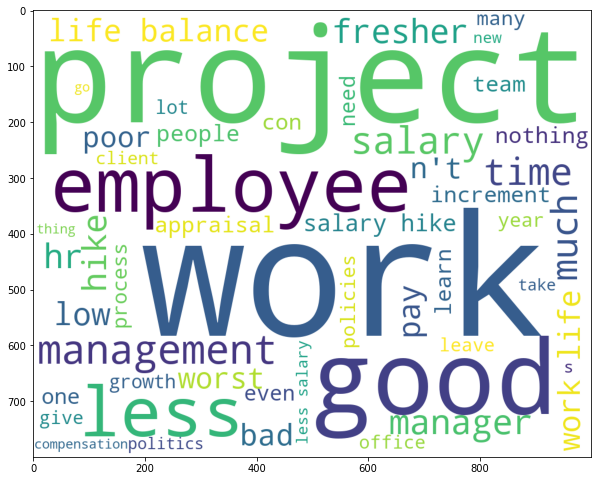

In [70]:
word_cloud = WordCloud().generate_from_text(Negative_Review)
word_cloud = WordCloud(width=1000,height=800,background_color='white',max_words = 50,random_state = 166, mode = 'RGBA').\
generate_from_text(Negative_Review)
plt.figure(figsize=[10,10])
plt.imshow(word_cloud)
plt.show()

** Model Building Steps**

In [71]:
# Removing Contraction from the Reviews
# -*- coding: utf-8 -*-

# Contraction Map
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [72]:
# Defining function for removing special characters

def remove_special_characters(text):
    #text = re.sub(r'[^a-zA-z0-9\s]', '', text)
    text = re.sub(r'[^a-zA-z\s]', '', text)

    return text

In [73]:
# Defining function for Lemmitization

def lemmatize_text (text):
  # tokens = word_tokenize(text.lower())
   lemmatized = [ lemm.lemmatize (word, pos = 'v') for word in  text]
  
   review = " ".join(lemmatized)
   return review

In [74]:
#Defining function for removing html tags from the review

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

In [75]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [76]:
#Creating customized list of all possible stop words

stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [77]:
#Creating Normalizing function for the review data

def normalize_corpus(corpus,contraction_expansion=True,
                      text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True,html_stripping = True, accented_char_removal = True ):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        #if html_stripping:
         #  doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # insert spaces between special characters to isolate them    
        special_char_pattern = re.compile(r'([{.(-)!}])')
        doc = special_char_pattern.sub(" \\1 ", doc)
        
        # remove special characters    
        if special_char_removal:
            doc = remove_special_characters(doc)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
        # spell correction
        spell = Speller()
        spell(doc)
        #if text_lemmatization:
         #   doc = lemmatize_text(doc)    
        normalized_corpus.append(doc)
        
    return normalized_corpus


In [78]:
# Uploading Datasets

Review_df = pd.read_csv(r'reviews_train.csv')

Review_df.head()

#reviews = np.array(Review_df['review'])
#sentiments = np.array(Review_df['sentiment'])

train_reviews = np.array(Review_df['review'])
train_sentiments = np.array(Review_df['sentiment'])

# build train and test datasets
#train_reviews, test_reviews, train_sentiments, test_sentiments =\
#    train_test_split(reviews, sentiments , test_size=0.20,  random_state=101)



In [79]:
#Normalizing Training Data

norm_train_reviews = normalize_corpus(train_reviews)

In [80]:
#Normalizing Test Data

#norm_test_reviews = normalize_corpus(test_reviews)

In [81]:
# Vectorizing the the Review

cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1,3))
cv_train_features = cv.fit_transform(norm_train_reviews)

tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(1,3), sublinear_tf=True)
tv_train_features = tv.fit_transform(norm_train_reviews)


#cv_test_features = cv.transform(norm_test_reviews)
#tv_test_features = tv.transform(norm_test_reviews)


In [82]:
#Building Model

lr = LogisticRegression(penalty='l2', max_iter=100, C=1)

In [83]:
def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:  {:2.2%} '.format(metrics.accuracy_score(true_labels, predicted_labels)))
    print('Precision: {:2.2%} '.format(metrics.precision_score(true_labels, predicted_labels, average='weighted')))
    print('Recall:    {:2.2%} '.format(metrics.recall_score(true_labels, predicted_labels, average='weighted')))
    print('F1 Score:  {:2.2%} '.format(metrics.f1_score(true_labels, predicted_labels, average='weighted')))
                        


def display_classification_report(true_labels, predicted_labels, target_names):

    report = metrics.classification_report(y_true=true_labels, y_pred=predicted_labels, target_names=target_names) 
    print(report)


def display_confusion_matrix(true_labels, predicted_labels, target_names):
    
    total_classes = len(target_names)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels)
    #cm_frame = pd.DataFrame(data=cm, 
     #                       columns=pd.MultiIndex(levels=[['Predicted:'], target_names], labels=level_labels), 
      #                      index=pd.MultiIndex(levels=[['Actual:'], target_names], labels=level_labels)) 
    print(cm) 
    


def display_model_performance_metrics(true_labels, predicted_labels, target_names):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, target_names=target_names)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, target_names=target_names)

In [84]:
def fit_model(classifier,  train_features, train_labels):
    # build model    
    classifier.fit(train_features, train_labels)

#def predict_model(classifier, test_features):
    # predict using model
 #   predictions = classifier.predict(test_features) 
  #  return predictions 


def predict_model(classifier, train_features):
    # predict using model
    predictions = classifier.predict(train_features) 
    return predictions   

In [87]:
#fit_model(classifier=lr,train_features=cv_train_features, train_labels=train_sentiments)

#lr_bow_predictions = predict_model(classifier=lr, train_features=cv_train_features )

#display_model_performance_metrics(true_labels=train_sentiments, predicted_labels=lr_bow_predictions,
                                  #target_names=['1', '0'])

In [88]:
test_review_df = pd.read_csv('reviews_test.csv')

In [89]:
test_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      819 non-null    int64 
 1   review  819 non-null    object
dtypes: int64(1), object(1)
memory usage: 12.9+ KB


In [90]:

test_review_test = test_review_df['review']

In [91]:
norm_test_reviews_test = normalize_corpus(test_review_test)

In [ ]:
#cv_test_features_test = cv.transform(norm_test_reviews_test)

In [94]:
tv_test_features_test = tv.transform(norm_test_reviews_test)

In [ ]:
#lr_bow_test_predictions = predict_model(classifier=lr, train_features=cv_test_features_test )

In [ ]:

#len(lr_bow_test_predictions)

819

In [ ]:
#submission = pd.DataFrame({ 'ID': test_review_df.ID.values, 'sentiment': lr_bow_test_predictions })
#submission.to_csv("sample_submission_9_lr_cv_onlytrain_removednos1_3.csv", index=False)

In [92]:
svm = SGDClassifier(loss='hinge', l1_ratio=0.15, max_iter=300, n_jobs=4, random_state=101)

In [93]:
#fit_model(classifier=svm,train_features=cv_train_features, train_labels=train_sentiments)

#svm_bow_predictions = predict_model(classifier=svm, train_features=cv_train_features )

#display_model_performance_metrics(true_labels=train_sentiments, predicted_labels=svm_bow_predictions,
                                  #target_names=['1', '0'])

In [ ]:
#svm_bow_test_predictions_cv = predict_model(classifier=svm, train_features=cv_test_features_test )

In [ ]:
#submission = pd.DataFrame({ 'ID': test_review_df.ID.values, 'sentiment': svm_bow_test_predictions_cv })
#submission.to_csv("sample_submission_11_svm_cv_onlytrain_nosremoved1_3.csv", index=False)

In [96]:
#fit_model(classifier=lr,train_features=tv_train_features, train_labels=train_sentiments)

#lr_bow_predictions_tv = predict_model(classifier=lr, train_features=tv_train_features )

#display_model_performance_metrics(true_labels=train_sentiments, predicted_labels=lr_bow_predictions_tv,
                                  #target_names=['1', '0'])

In [ ]:
#tv_test_features_test_lr = tv.transform(norm_test_reviews_test)

In [ ]:
#lr_bow_test_predictions_tv = predict_model(classifier=lr, train_features=tv_test_features_test_lr )

In [ ]:
#submission = pd.DataFrame({ 'ID': test_review_df.ID.values, 'sentiment': lr_bow_test_predictions_tv })
#submission.to_csv("sample_submission_10_lr_tv_onlytrain_nosremoved1_3.csv", index=False)

In [97]:
fit_model(classifier=svm,train_features=tv_train_features, train_labels=train_sentiments)

svm_bow_predictions_tv = predict_model(classifier=svm, train_features=tv_train_features )

display_model_performance_metrics(true_labels=train_sentiments, predicted_labels=svm_bow_predictions_tv,
                                  target_names=['1', '0'])

Model Performance metrics:
------------------------------
Accuracy:  99.95% 
Precision: 99.95% 
Recall:    99.95% 
F1 Score:  99.95% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       955
           0       1.00      1.00      1.00       956

    accuracy                           1.00      1911
   macro avg       1.00      1.00      1.00      1911
weighted avg       1.00      1.00      1.00      1911


Prediction Confusion Matrix:
------------------------------
[[955   0]
 [  1 955]]


In [ ]:
tv_test_features_test = tv.transform(norm_test_reviews_test)

In [98]:
svm_bow_test_predictions_tv_onlytrain = predict_model(classifier=svm, train_features=tv_test_features_test )

In [99]:
submission = pd.DataFrame({ 'ID': test_review_df.ID.values, 'sentiment': svm_bow_test_predictions_tv_onlytrain })
submission.to_csv("sample_submission_12_svm_tv_onlytrain_1_3.csv", index=False)

In [ ]:
#rf = RandomForestClassifier(n_estimators=100, max_depth = 5)

In [ ]:
#fit_model(classifier=rf,train_features=cv_train_features, train_labels=train_sentiments)

#rf_bow_predictions_cv = predict_model(classifier=rf, test_features=tv_test_features )

#display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=rf_bow_predictions_cv,
                                  target_names=['1', '0'])

Model Performance metrics:
------------------------------
Accuracy:  51.44% 
Precision: 75.59% 
Recall:    51.44% 
F1 Score:  37.33% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.50      1.00      0.67       188
           0       1.00      0.05      0.09       195

    accuracy                           0.51       383
   macro avg       0.75      0.52      0.38       383
weighted avg       0.76      0.51      0.37       383


Prediction Confusion Matrix:
------------------------------
[[188   0]
 [186   9]]


In [ ]:
#svc = SVC(kernel='linear', random_state=0)

#fit_model(classifier=svc,train_features=cv_train_features, train_labels=train_sentiments)

#svc_bow_predictions_cv = predict_model(classifier=svc, test_features=tv_test_features )

#display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=svc_bow_predictions_cv,
                                  target_names=['1', '0'])


NameError: ignored